In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from karateclub import DeepWalk, Walklets, HOPE, NetMF, Diff2Vec, GraRep, Node2Vec
from utils import read_data, get_cosine_sim_matrix, preprocessing_, compute_metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import normalized_mutual_info_score
import pickle
import _pickle as cPickle
import pandas as pd
from gensim.utils import simple_preprocess
from utils import stopwords_long
from gensim.matutils import corpus2dense, corpus2csc
from sklearn.cluster import KMeans

In [2]:

def visualize_TSNE(embeddings,target):
    tsne = TSNE(n_components=2)
    data = tsne.fit_transform(embeddings)
    print(data.shape)
#     data = embeddings
    #plt.figure(figsize=(12, 6))
    plt.title("TSNE visualization of the embeddings")
    plt.scatter(data[:,0],data[:,1],c=target)

    return

## 20 News

In [3]:
group = 'NG3'

text_corpus, file_names, target = read_data(group)

preprocessed_text = [preprocessing_(e) for e in text_corpus]
text_corpus = preprocessed_text



## Data preprocessing

In [4]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_corpus)
print(vectors.shape)

(600, 11923)


In [5]:
N = vectors.shape[0]
mat = kneighbors_graph(vectors, N, metric='cosine', mode='distance', include_self=True)
mat.data = 1 - mat.data  # to similarity
g = nx.from_scipy_sparse_matrix(mat, create_using=nx.Graph())

## Grarep

In [11]:
group = 'NG6'
d = 6
f1_list = []
nmi_list = []

text_corpus, file_names, target = read_data(group)

preprocessed_text = [preprocessing_(e) for e in text_corpus]
text_corpus = preprocessed_text

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_corpus)
print(vectors.shape)

N = vectors.shape[0]
mat = kneighbors_graph(vectors, N, metric='cosine', mode='distance', include_self=True)
mat.data = 1 - mat.data  # to similarity
g = nx.from_scipy_sparse_matrix(mat, create_using=nx.Graph())

model = GraRep(dimensions=64, order=3)
model.fit(g)
embedding = model.get_embedding() # 192

scaler = MinMaxScaler()
scaler.fit(embedding)
scaled_emb = scaler.transform(embedding)
f1 = compute_metrics(scaled_emb, target)

kmeans = KMeans(n_clusters=d, random_state=0).fit(scaled_emb)
nmi = normalized_mutual_info_score(target,kmeans.labels_)

print(f1)
print(nmi)

(1200, 18909)

Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.8277270931602848
0.8277270931602848
0.6262161593141098


(1200, 2)


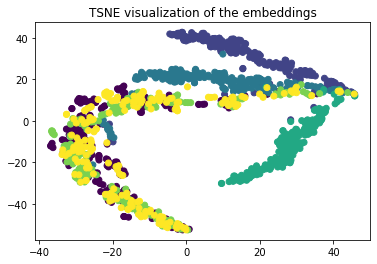

In [10]:
visualize_TSNE(embedding, target)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


In [12]:
X.todense()

matrix([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

In [16]:
x = []
for i in corpus:
    x.extend(i.lower().split())